In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Functions_Vincent import *
from functions import *

from sklearn import preprocessing

pd.options.display.max_columns = 50
pd.options.display.max_rows = 100
pd.set_option('display.width', 1000)

#Types de couleurs utilisées pour les comparaisons de grade
colors=["limegreen","gold", "darkorange", "red","steelblue","purple","black","grey","pink"]

from matplotlib import style
#style.use('dark_background')
style.use('default')

In [2]:
# Regardons le nom des colonnes, le type de variable et leurs taux de valeurs utilisables
Df_category_name = pd.read_csv('product_category_name_translation.csv').drop_duplicates()
print('Df_category_name')
print(Df_category_name.columns.values)
info_data_unique(Df_category_name)
print(' ')
#for cat_en, cat_port in zip(Df_category_name.product_category_name_english,Df_category_name.product_category_name) :
#    print(cat_en,"---",cat_port)

Df_category_name
['product_category_name' 'product_category_name_english']
les colonnes sont de types :   [dtype('O')]
  
il y a : 71 lignes, 2 colonnes
  
il y a : 100.0 % de valeurs utilisables
 


In [3]:
Df_sellers = pd.read_csv('olist_sellers_dataset.csv').drop_duplicates()
print('Df_sellers')
print(Df_sellers.columns.values)
info_data_unique(Df_sellers)
Df_sellers.nunique()

Df_sellers
['seller_id' 'seller_zip_code_prefix' 'seller_city' 'seller_state']
les colonnes sont de types :   [dtype('O') dtype('int64')]
  
il y a : 3095 lignes, 4 colonnes
  
il y a : 100.0 % de valeurs utilisables


seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

Df_products
['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']
les colonnes sont de types :   [dtype('O') dtype('float64')]
  
il y a : 32951 lignes, 9 colonnes
  
il y a : 99.2 % de valeurs utilisables


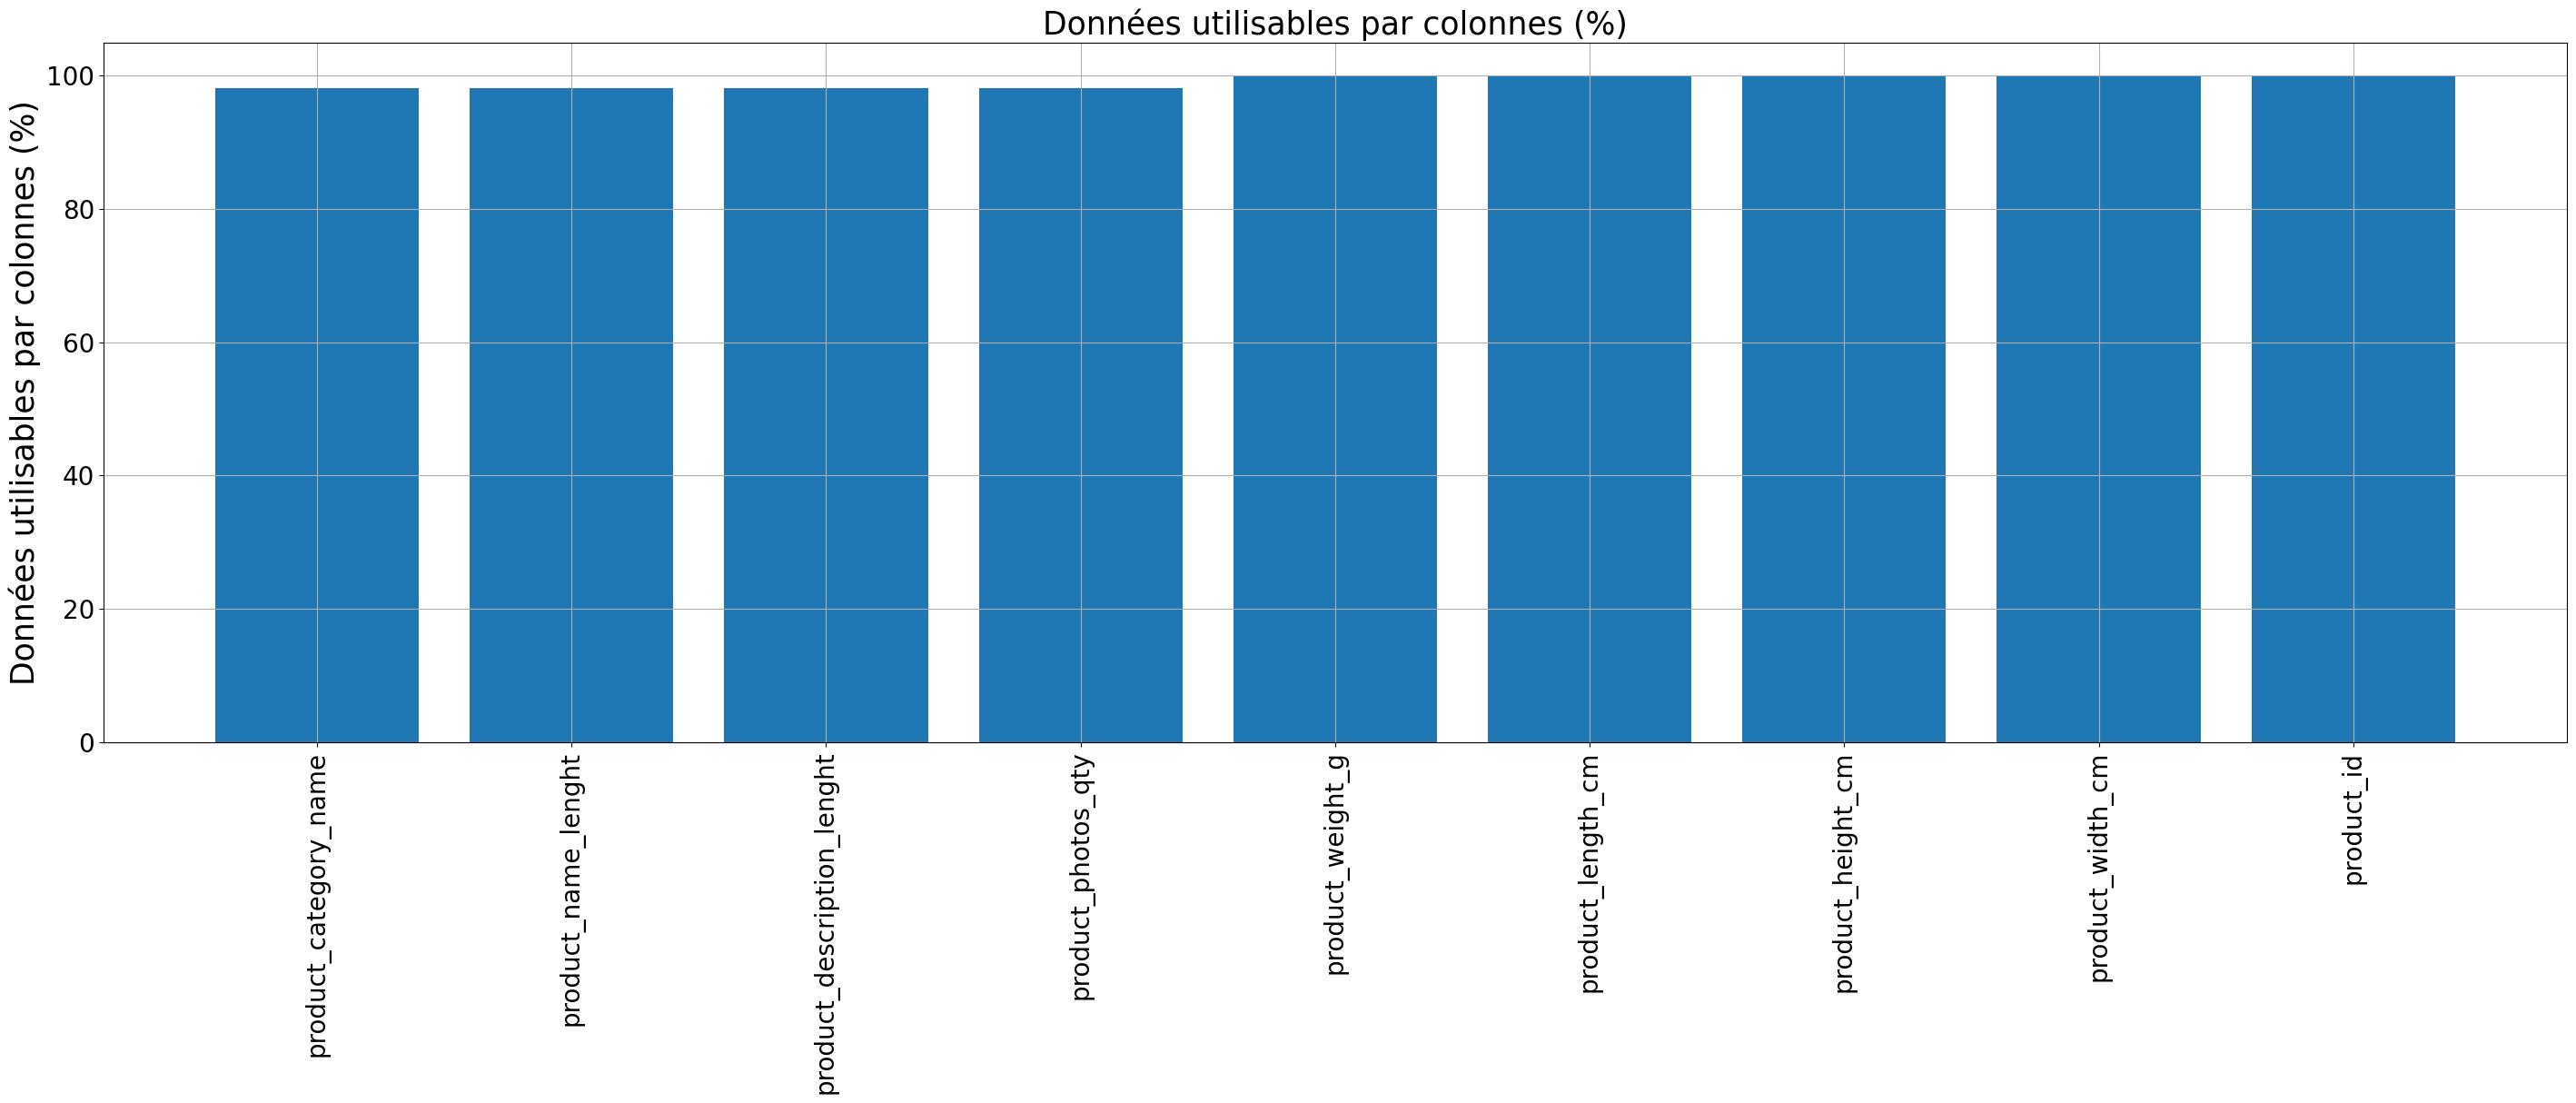

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [4]:
Df_products = pd.read_csv('olist_products_dataset.csv').drop_duplicates()
print('Df_products')
print(Df_products.columns.values)
info_data_unique(Df_products)

#Quelques valeurs manquantes:
plot_valeurs_utilisables(Df_products)

Df_products.head()
#Un lit :40Kg => Ok
Df_products[Df_products.product_weight_g>25000]

Df_products.describe()

In [5]:
Df_products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [6]:
#il ya 2 catégories de plus que dans le Df_catégorie
Df_products.nunique()
print(Df_products.product_category_name[~Df_products.product_category_name.isin(Df_category_name.product_category_name)].unique())

[nan 'pc_gamer' 'portateis_cozinha_e_preparadores_de_alimentos']


Df_orders
['order_id' 'customer_id' 'order_status' 'order_purchase_timestamp'
 'order_approved_at' 'order_delivered_carrier_date'
 'order_delivered_customer_date' 'order_estimated_delivery_date']
les colonnes sont de types :   [dtype('O')]
  
il y a : 99441 lignes, 8 colonnes
  
il y a : 99.4 % de valeurs utilisables


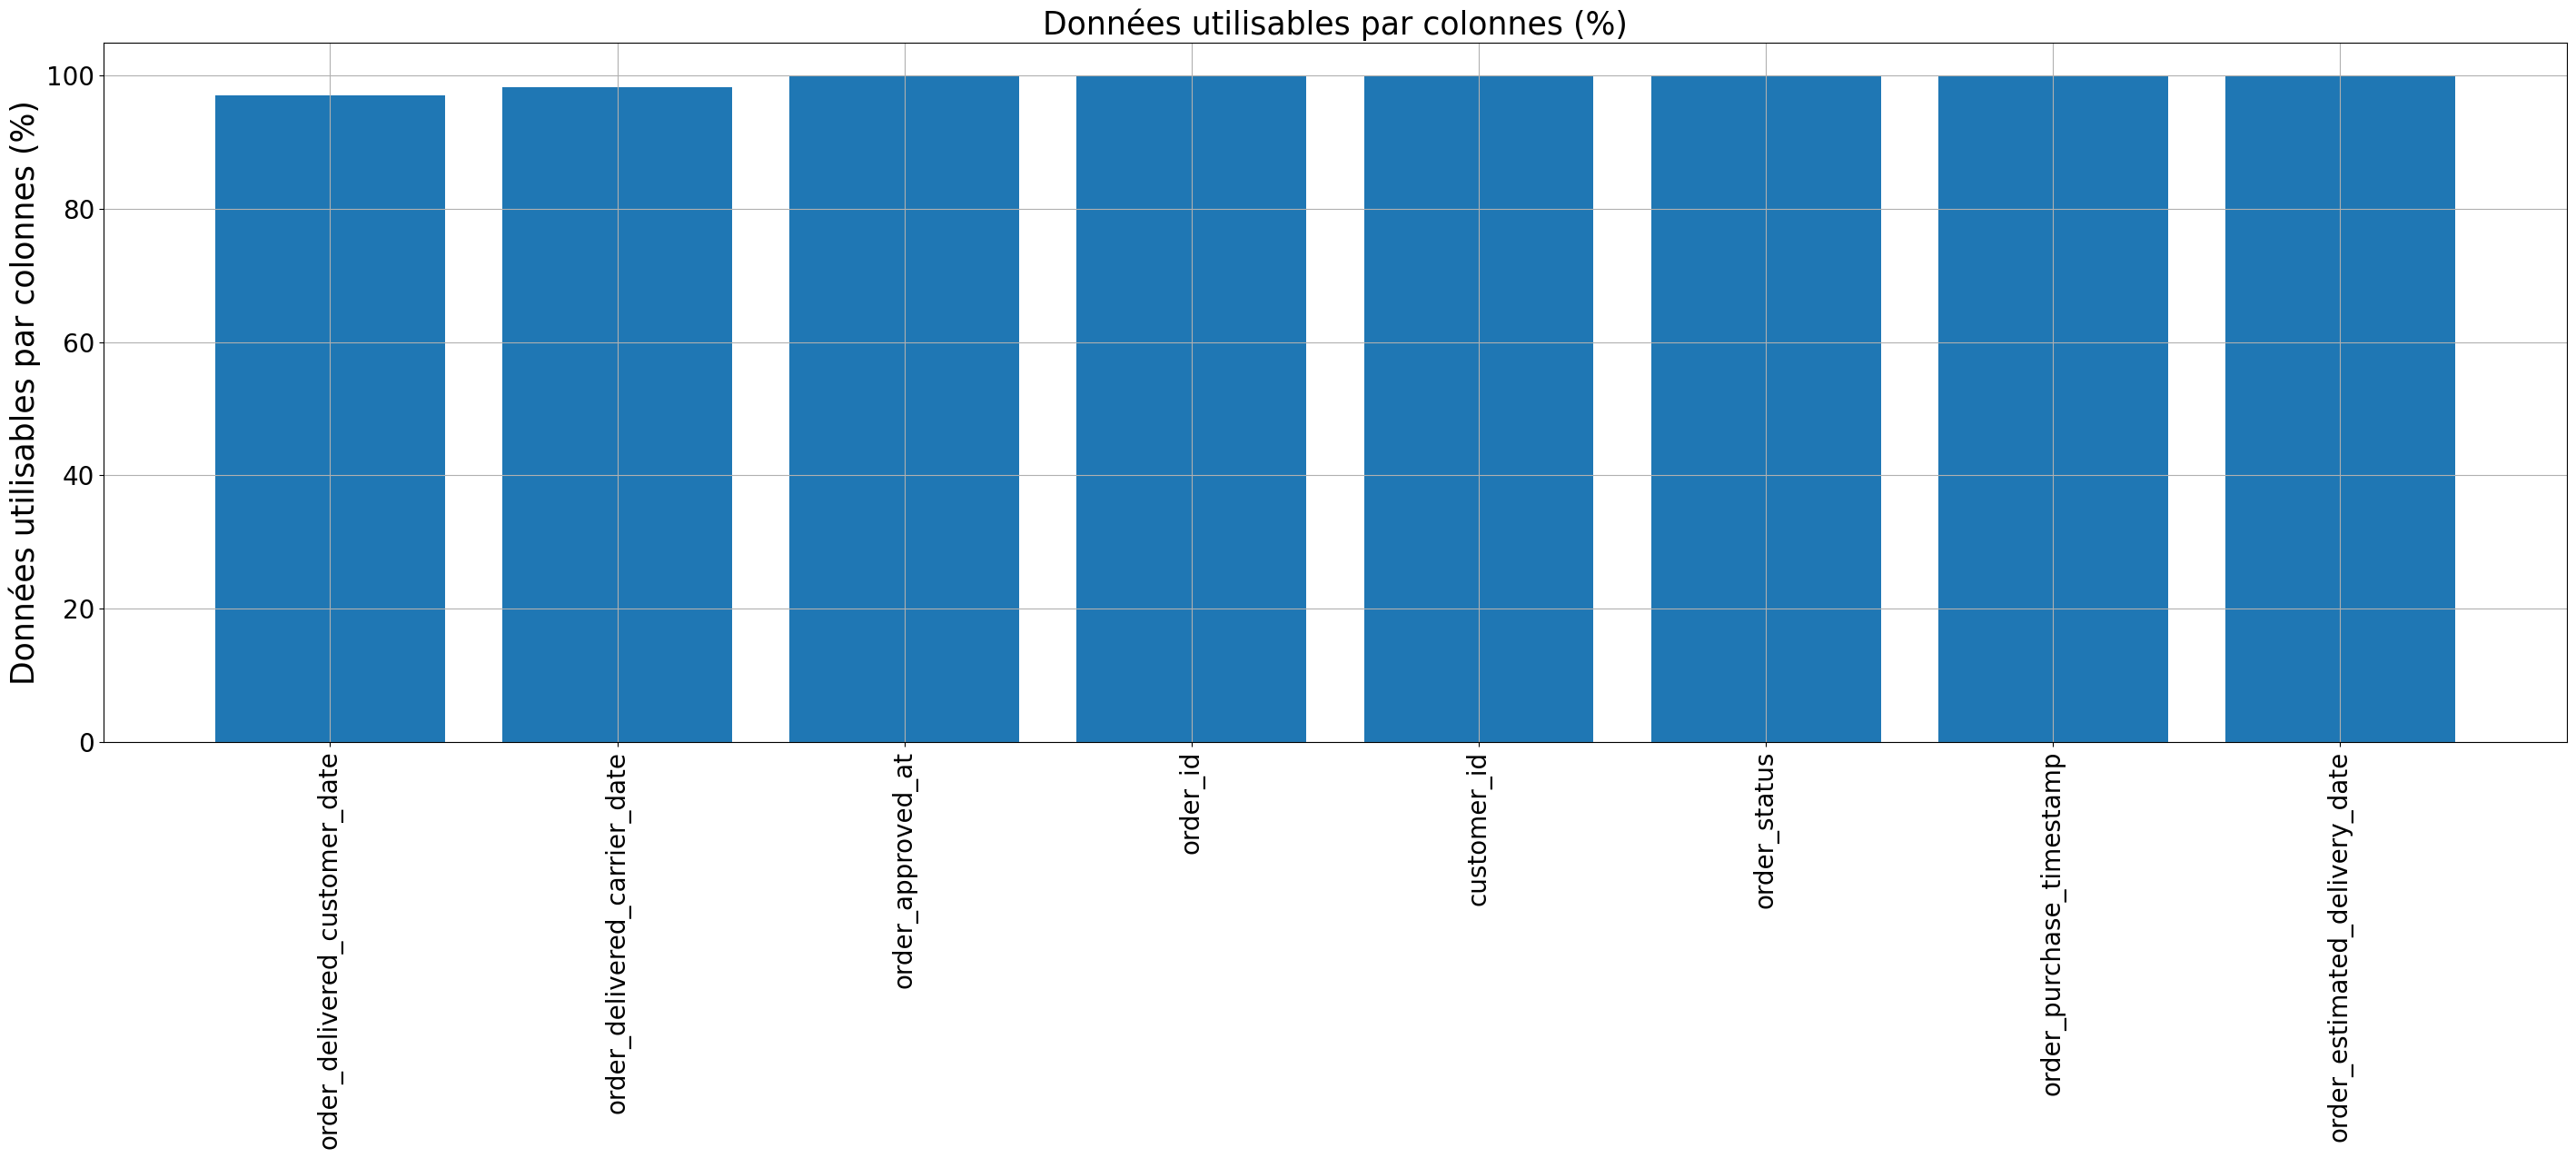

different types of order_status : ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


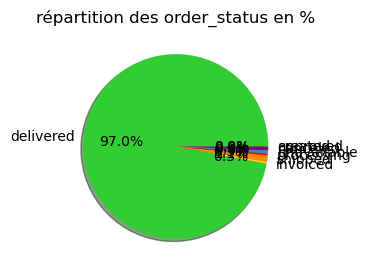

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
13390,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00


In [7]:
Df_orders = pd.read_csv('olist_orders_dataset.csv').drop_duplicates()
print('Df_orders')

print(Df_orders.columns.values)
info_data_unique(Df_orders)


plot_valeurs_utilisables(Df_orders)

print("different types of order_status :",Df_orders.order_status.unique())

#Vérifions la répartition par nutrition grade
Df_reparti_grade=pd.DataFrame()
fig=plt.figure(figsize=(3,3))
for status in Df_orders.order_status.unique() :
    Df_reparti_grade[status] = [len(Df_orders[Df_orders['order_status']==status])/len(Df_orders)*100]
    
Df_reparti_grade =Df_reparti_grade.T
plt.pie(Df_reparti_grade[0], labels=Df_reparti_grade.index, autopct='%1.1f%%', shadow=True,colors = colors)
plt.title("répartition des order_status en %")
plt.show()



Df_orders[Df_orders.order_id=='03caa2c082116e1d31e67e9ae3700499']
#order_delivered_carrier_date :  date de livraison transporteur

Df_order_reviews
['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']
les colonnes sont de types :   [dtype('O') dtype('int64')]
  
il y a : 99224 lignes, 7 colonnes
  
il y a : 79.0 % de valeurs utilisables
 
4 --- recomendo
5 --- Super recomendo
1 --- Não chegou meu produto 
5 --- Ótimo
4 --- Muito bom.
5 --- Bom
5 --- Maravilhoso!
5 --- Entrega perfeita
5 --- MT lindo
5 --- Ótimo Produto! 
5 --- RECOMENDO SEMPRE!!
5 --- ***** Recomendo
5 --- OTIMO
3 --- Entrega atrasou
5 --- muito boa
4 ---  4 
1 --- Médio
5 --- prazo entrega
5 --- Super produto 
1 --- falta de produto e quebra


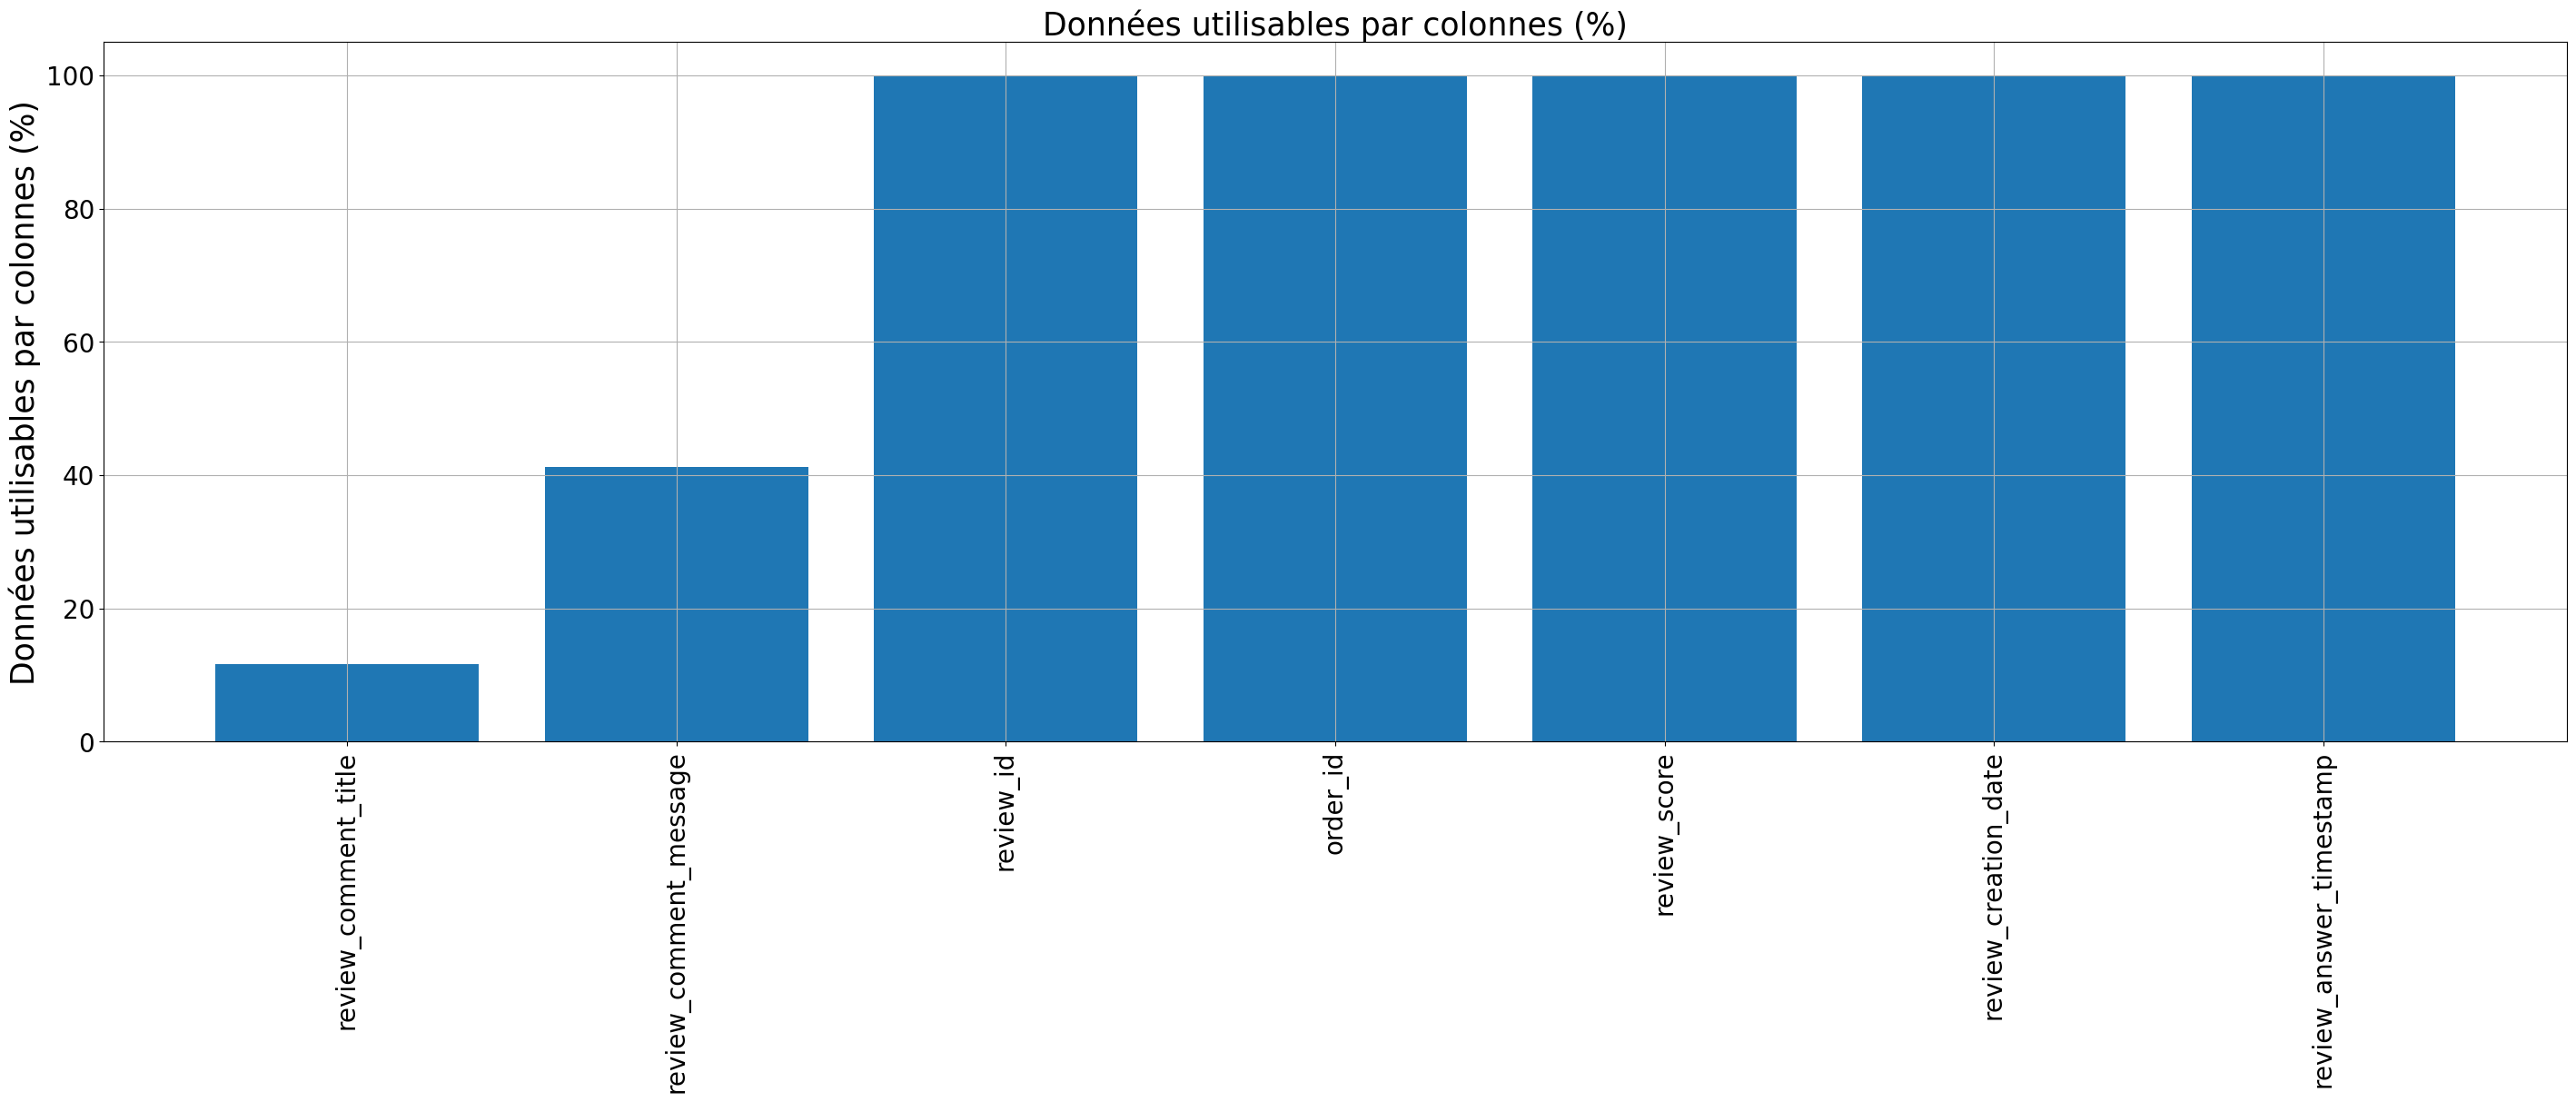

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
29745,211fa81a22870cc634265ea85b751e40,03caa2c082116e1d31e67e9ae3700499,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39


In [8]:
Df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv').drop_duplicates()
print('Df_order_reviews')
print(Df_order_reviews.columns.values)
info_data_unique(Df_order_reviews)
Df_order_reviews.describe()

print(' ')
Df_order_reviews_dropna= Df_order_reviews.dropna()
for score, title in zip(Df_order_reviews_dropna['review_score'][0:20],Df_order_reviews_dropna['review_comment_title'][0:20]) :
    print(score,"---",title)
    
#0 = pas du tout content
#5 = très content

plot_valeurs_utilisables(Df_order_reviews)

#Un payement de 13000 avec un score de 1 : pas cool
Df_order_reviews[Df_order_reviews.order_id=='03caa2c082116e1d31e67e9ae3700499']


In [9]:
Df_payements = pd.read_csv('olist_order_payments_dataset.csv').drop_duplicates()
print('Df_payements')

print(Df_payements.columns.values)
info_data_unique(Df_payements)

#Les payements en plus 20 fois sont fait avec des bons
Df_payements[Df_payements.payment_sequential>20].sort_values(by='order_id')

Df_payements[Df_payements.payment_value>800].sort_values(by='order_id')

#Un payement de 6000 en billet c'est étrange

Df_payements.describe()

#Certains payement sont de 0
Df_payements[Df_payements.payment_value==0]
Df_payements[Df_payements.order_id=='8bcbe01d44d147f901cd3192671144db']



Df_payements
['order_id' 'payment_sequential' 'payment_type' 'payment_installments'
 'payment_value']
les colonnes sont de types :   [dtype('O') dtype('int64') dtype('float64')]
  
il y a : 103886 lignes, 5 colonnes
  
il y a : 100.0 % de valeurs utilisables


,order_id,payment_sequential,payment_type,payment_installments,payment_value
5163,8bcbe01d44d147f901cd3192671144db,3,voucher,1,6.25
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00
20963,8bcbe01d44d147f901cd3192671144db,1,credit_card,1,36.21
63762,8bcbe01d44d147f901cd3192671144db,2,voucher,1,31.70


In [10]:
Df_order_items = pd.read_csv('olist_order_items_dataset.csv').drop_duplicates()
print('Df_order_items')

print(Df_order_items.columns.values)
info_data_unique(Df_order_items)


Df_order_items[Df_order_items.freight_value>300]

#Une commande avec plusieurs fois le même produit dedans
Df_order_items[Df_order_items.order_id=='03caa2c082116e1d31e67e9ae3700499']

Df_order_items.describe()
Df_order_items[Df_order_items.order_item_id>18].sort_values(by='order_id')

Df_order_items[Df_order_items.order_id=='8bcbe01d44d147f901cd3192671144db']



Df_order_items
['order_id' 'order_item_id' 'product_id' 'seller_id' 'shipping_limit_date'
 'price' 'freight_value']
les colonnes sont de types :   [dtype('O') dtype('int64') dtype('float64')]
  
il y a : 112650 lignes, 7 colonnes
  
il y a : 100.0 % de valeurs utilisables


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
61321,8bcbe01d44d147f901cd3192671144db,1,85d4c1a46f08f730de651ea6f6645313,3d871de0142ce09b7081e2b9d1733cb1,2018-01-30 23:37:20,59.0,15.16


In [11]:
Df_geo = pd.read_csv('olist_geolocation_dataset.csv').drop_duplicates()
print('Df_geo')
print(Df_geo.columns.values)
info_data_unique(Df_geo)
Df_geo.nunique()

Df_geo
['geolocation_zip_code_prefix' 'geolocation_lat' 'geolocation_lng'
 'geolocation_city' 'geolocation_state']
les colonnes sont de types :   [dtype('int64') dtype('float64') dtype('O')]
  
il y a : 738332 lignes, 5 colonnes
  
il y a : 100.0 % de valeurs utilisables


geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

In [12]:
Df_customers = pd.read_csv('olist_customers_dataset.csv').drop_duplicates()
print('Df_customers')

print(Df_customers.columns.values)
info_data_unique(Df_customers)


Df_customers
['customer_id' 'customer_unique_id' 'customer_zip_code_prefix'
 'customer_city' 'customer_state']
les colonnes sont de types :   [dtype('O') dtype('int64')]
  
il y a : 99441 lignes, 5 colonnes
  
il y a : 100.0 % de valeurs utilisables


In [13]:
#Regardons le nom des colonne, le type de variable et leurs taux de valeurs utilisables
print('Df_category_name')
print(Df_category_name.columns.values)
print(' ')

print('Df_sellers')
print(Df_sellers.columns.values)

print(' ')

print('Df_products')
print(Df_products.columns.values)

print(' ')

print('Df_orders')
print(Df_orders.columns.values)

print(' ')

print('Df_order_reviews')
print(Df_order_reviews.columns.values)

print(' ')

print('Df_payements')
print(Df_payements.columns.values)

print(' ')

print('Df_order_items')
print(Df_order_items.columns.values)

print(' ')

print('Df_geo')
print(Df_geo.columns.values)
print(' ')


print('Df_customers')
print(Df_customers.columns.values)


Df_category_name
['product_category_name' 'product_category_name_english']
 
Df_sellers
['seller_id' 'seller_zip_code_prefix' 'seller_city' 'seller_state']
 
Df_products
['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']
 
Df_orders
['order_id' 'customer_id' 'order_status' 'order_purchase_timestamp'
 'order_approved_at' 'order_delivered_carrier_date'
 'order_delivered_customer_date' 'order_estimated_delivery_date']
 
Df_order_reviews
['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']
 
Df_payements
['order_id' 'payment_sequential' 'payment_type' 'payment_installments'
 'payment_value']
 
Df_order_items
['order_id' 'order_item_id' 'product_id' 'seller_id' 'shipping_limit_date'
 'price' 'freight_value']
 
Df_geo
['geolocation_zip_code_prefix' 'geolocation_lat' 'geo

In [14]:
Df_order_items.groupby(by= 'order_id').sum().sort_values(by='order_item_id',ascending=False)

,order_item_id,price,freight_value
order_id,,,
8272b63d03f5f79c56e9e4120aec44ef,231,31.80,164.37
1b15974a0141d54e36626dca3fdc731a,210,2000.00,202.40
ab14fdcfbe524636d65ee38360e22ce8,210,1974.00,288.80
9ef13efd6949e4573a18964dd1bbe7f5,120,765.00,18.00
428a2f660dc84138d969ccd69a0ab6d5,120,982.35,243.30
...,...,...,...
5a0911d70c1f85d3bed0df1bf693a6dd,1,59.00,51.13
5a082b558a3798d3e36d93bfa8ca1eae,1,9.00,15.23
5a07264682e0b8fbb3f166edbbffc6e8,1,19.90,19.32


In [15]:
Df= pd.merge(pd.merge(pd.merge(pd.merge(Df_order_items,Df_orders),Df_sellers),Df_order_reviews),Df_payements)


In [16]:
Df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value'], dtype='object')

In [17]:
#Calculons le nombre de ventes par vendeurs 

Df_sellers['number_of_sales']=0
for seller in Df.seller_id.unique():
    Df_sellers['number_of_sales'][Df_sellers.seller_id==seller] = Df.order_id[Df.seller_id==seller].nunique()

C:\Users\33646\AppData\Local\Temp/ipykernel_12256/3961071004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_sellers['number_of_sales'][Df_sellers.seller_id==seller] = Df.order_id[Df.seller_id==seller].nunique()


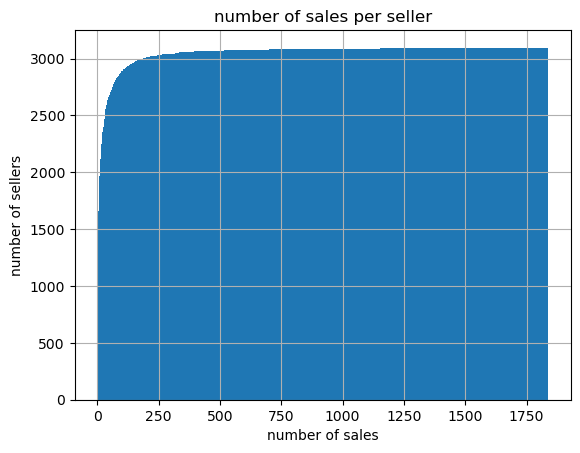

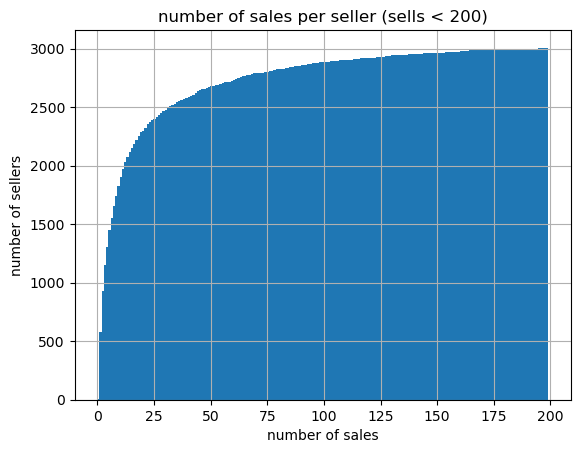

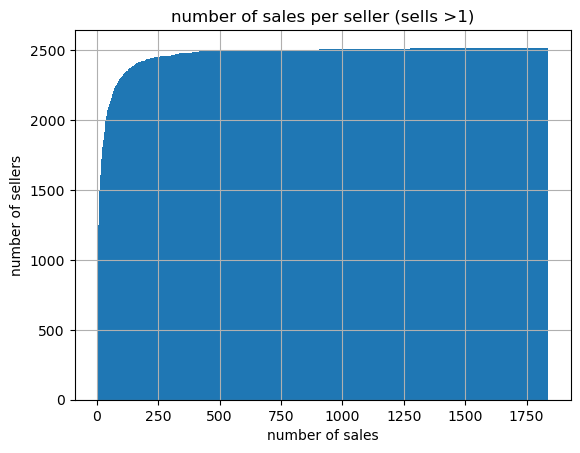

In [18]:
#Gardons une ligne par evndeur et plotons la répartition du nombre de vente par vendeur
hist_of_sales= Df_sellers[["seller_id","number_of_sales"]].drop_duplicates().iloc[:,1]
plt.hist(hist_of_sales,bins=500,cumulative=True)
plt.title('number of sales per seller')
plt.xlabel('number of sales')
plt.ylabel('number of sellers')
plt.grid()
plt.show()

hist_of_sales= Df_sellers[["seller_id","number_of_sales"]].drop_duplicates()\
                .iloc[:,1][Df_sellers[["seller_id","number_of_sales"]].drop_duplicates().iloc[:,1]<200]
plt.hist(hist_of_sales,bins=500,cumulative=True)
plt.title('number of sales per seller (sells < 200)')
plt.xlabel('number of sales')
plt.ylabel('number of sellers')
plt.grid()
plt.show()

hist_of_sales= Df_sellers[["seller_id","number_of_sales"]].drop_duplicates()\
                .iloc[:,1][Df_sellers[["seller_id","number_of_sales"]].drop_duplicates().iloc[:,1]>1]
plt.hist(hist_of_sales,bins=500,cumulative=True)
plt.title('number of sales per seller (sells >1)')
plt.xlabel('number of sales')
plt.ylabel('number of sellers')
plt.grid()
plt.show()

In [20]:
#Ajoutons le chiffre d'affaire total et moyen
Df_sellers['sum_price']= 0
Dfgroupby= Df[["price","seller_id"]].groupby('seller_id').sum()

for seller in Df.seller_id.unique():
    Df_sellers['sum_price'][Df_sellers.seller_id==seller]= Dfgroupby.loc[seller]["price"]
    


C:\Users\33646\AppData\Local\Temp/ipykernel_12256/3961229351.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_sellers['sum_price'][Df_sellers.seller_id==seller]= Dfgroupby.loc[seller]["price"]
C:\Users\33646\AppData\Local\Temp/ipykernel_12256/3961229351.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_sellers['sum_price'][Df_sellers.seller_id==seller]= Dfgroupby.loc[seller]["price"]


In [21]:
Df_sellers['mean_price']= 0
Dfgroupby= Df[["price","seller_id"]].groupby('seller_id').mean()

for seller in Df.seller_id.unique():
    Df_sellers['mean_price'][Df_sellers.seller_id==seller]= Dfgroupby.loc[seller]["price"]

C:\Users\33646\AppData\Local\Temp/ipykernel_12256/1578787863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_sellers['mean_price'][Df_sellers.seller_id==seller]= Dfgroupby.loc[seller]["price"]
C:\Users\33646\AppData\Local\Temp/ipykernel_12256/1578787863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_sellers['mean_price'][Df_sellers.seller_id==seller]= Dfgroupby.loc[seller]["price"]


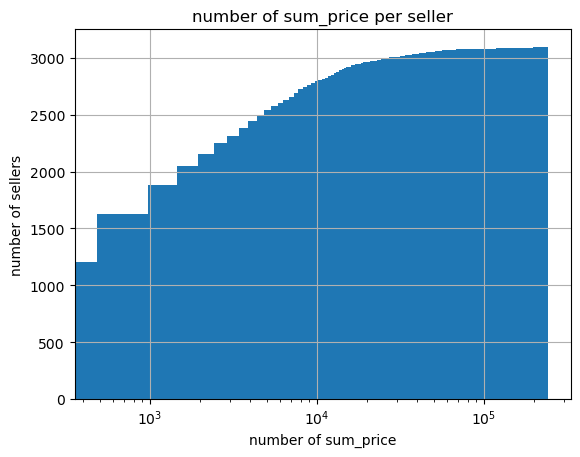

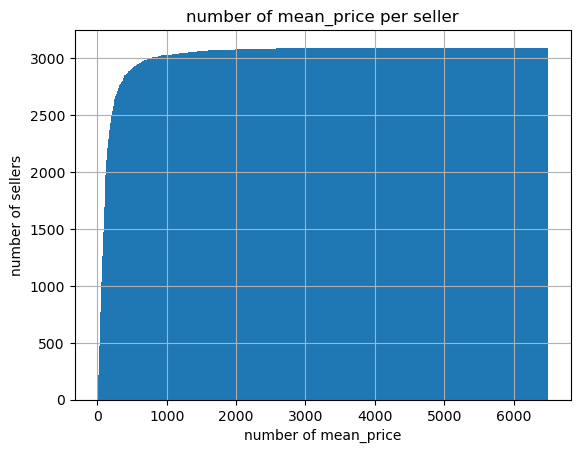

In [22]:
#Gardons une ligne par evndeur et plotons la répartition du sum_price par vendeur
hist_of_sumprice= Df_sellers[["seller_id","sum_price"]].drop_duplicates().iloc[:,1]
plt.hist(hist_of_sumprice,bins=500,cumulative=True)
plt.title('number of sum_price per seller')
plt.xlabel('number of sum_price')
plt.ylabel('number of sellers')
plt.xscale('log')
plt.grid()
plt.show()

#Gardons une ligne par evndeur et plotons la répartition du mean_price par vendeur
hist_of_sumprice= Df_sellers[["seller_id","mean_price"]].drop_duplicates().iloc[:,1]
plt.hist(hist_of_sumprice,bins=500,cumulative=True)
plt.title('number of mean_price per seller')
plt.xlabel('number of mean_price')
plt.ylabel('number of sellers')
#plt.xscale('log')
plt.grid()
plt.show()

In [23]:
Df.groupby('seller_id').mean().sort_values(by='price', ascending=False)

,order_item_id,price,freight_value,seller_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value
seller_id,,,,,,,,
ee27a8f15b1dded4d213a468ba4eb391,1.00,6499.000000,227.660000,74210.0,5.000000,1.0,1.000000,6726.6600
585175ec331ea177fa47199e39a6170a,1.00,3549.000000,53.470000,39400.0,5.000000,1.0,1.000000,3602.4700
abe021b01ba992245271b9aa422032df,1.00,3360.000000,58.620000,80420.0,3.500000,1.0,3.000000,3418.6200
a00824eb9093d40e589b940ec45c4eb0,1.00,3133.323333,126.496667,18590.0,4.666667,1.0,7.333333,3259.8200
e2a1ac9bf33e5549a2a4f834e70df2f8,1.00,2999.890000,40.222000,1210.0,4.800000,1.0,6.400000,3040.1120
...,...,...,...,...,...,...,...,...
1fa2d3def6adfa70e58c276bb64fe5bb,5.00,6.900000,9.000000,4106.0,1.000000,1.0,2.000000,217.1800
77128dec4bec4878c37ab7d6169d6f26,1.00,6.500000,8.720000,2610.0,5.000000,1.0,1.000000,15.2200
6c9875b2f94ba781186f0c1aed8d1687,2.25,6.250000,9.512500,17380.0,5.000000,1.0,1.000000,85.1675


In [24]:
Df_sellers['mean_review_score']= 0
Dfgroupby= Df[["seller_id","review_score"]].groupby('seller_id').mean()

for seller in Df.seller_id.unique():
    Df_sellers['mean_review_score'][Df_sellers.seller_id==seller]= Dfgroupby.loc[seller]["review_score"]

C:\Users\33646\AppData\Local\Temp/ipykernel_12256/1359917649.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_sellers['mean_review_score'][Df_sellers.seller_id==seller]= Dfgroupby.loc[seller]["review_score"]
C:\Users\33646\AppData\Local\Temp/ipykernel_12256/1359917649.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_sellers['mean_review_score'][Df_sellers.seller_id==seller]= Dfgroupby.loc[seller]["review_score"]


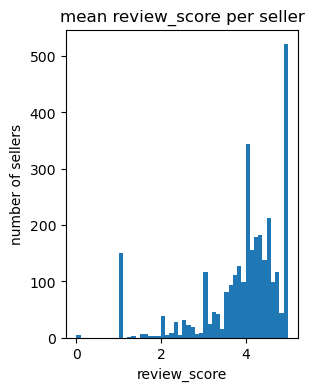

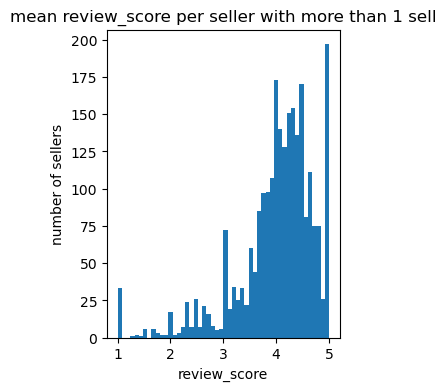

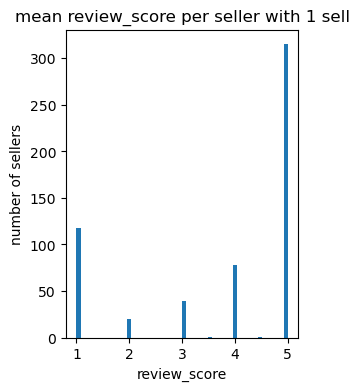

In [25]:
#Calculons la répartition moyenne des review_score par vendeur
review_score_hist = Df_sellers['mean_review_score']

fig=plt.figure(figsize=(3,4))
plt.hist(review_score_hist,bins=50)
plt.title('mean review_score per seller')
plt.xlabel('review_score')
plt.ylabel('number of sellers')
plt.show()

#Calculons la répartition moyenne des review_score par vendeur (avec plus d'une vente)
multi_order_review_score_hist = Df_sellers['mean_review_score'][Df_sellers.number_of_sales>1]

fig=plt.figure(figsize=(3,4))
plt.hist(multi_order_review_score_hist,bins=50)
plt.title('mean review_score per seller with more than 1 sell')
plt.xlabel('review_score')
plt.ylabel('number of sellers')
plt.show()

#Calculons la répartition moyenne des review_score par vendeur (avec une seule vente)
multi_order_review_score_hist = Df_sellers['mean_review_score'][Df_sellers.number_of_sales==1]

fig=plt.figure(figsize=(3,4))
plt.hist(multi_order_review_score_hist,bins=50)
plt.title('mean review_score per seller with 1 sell')
plt.xlabel('review_score')
plt.ylabel('number of sellers')
plt.show()

In [26]:
#Calculons le nombre de ventes par vendeurs 

Df_sellers['number_of_clients']=0

for seller in Df.seller_id.unique():
    Df_sellers['number_of_clients'][Df_sellers.seller_id==seller] = Df.customer_id[Df.seller_id==seller].nunique()

C:\Users\33646\AppData\Local\Temp/ipykernel_12256/739599352.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_sellers['number_of_clients'][Df_sellers.seller_id==seller] = Df.customer_id[Df.seller_id==seller].nunique()


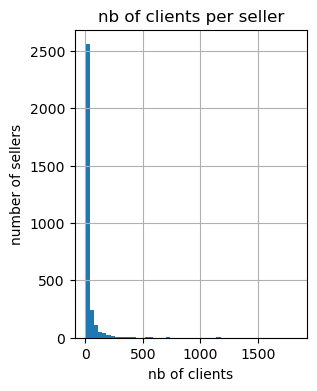

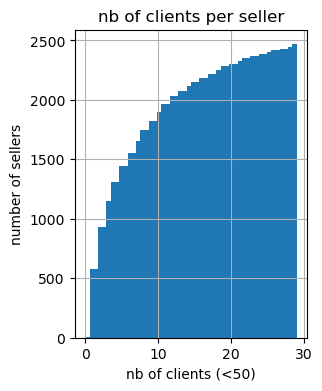

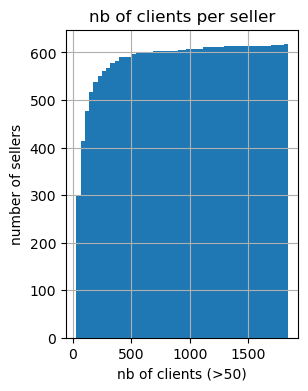

In [30]:
#Calculons la répartition moyenne des number_of_clients par vendeur
review_client_hist = Df_sellers[["seller_id","number_of_clients"]].groupby(by='seller_id').mean()

fig=plt.figure(figsize=(3,4))
plt.hist(review_client_hist,bins=50)
plt.title('nb of clients per seller')
plt.xlabel('nb of clients')
plt.ylabel('number of sellers')
plt.grid()
plt.show()

#Calculons la répartition moyenne des number_of_clients<50 par vendeur 
review_client_hist_inf = review_client_hist[review_client_hist['number_of_clients']<30]

fig=plt.figure(figsize=(3,4))
plt.hist(review_client_hist_inf,bins=50,cumulative=True)
plt.title('nb of clients per seller')
plt.xlabel('nb of clients (<50)')
plt.ylabel('number of sellers')
plt.grid()

plt.show()

#Calculons la répartition moyenne des number_of_clients>50 par vendeur
review_client_hist_sup = review_client_hist[review_client_hist['number_of_clients']>30]

fig=plt.figure(figsize=(3,4))
plt.hist(review_client_hist_sup,bins=50,cumulative=True)
plt.title('nb of clients per seller')
plt.xlabel('nb of clients (>50)')
plt.ylabel('number of sellers')
plt.grid()
plt.show()

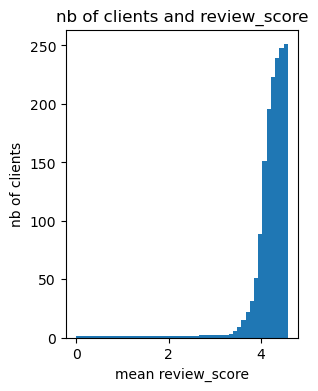

In [31]:
#Calculons la répartition moyenne des number_of_clients>50 par vendeur
review_client_hist = Df_sellers[["mean_review_score","number_of_clients"]].groupby('number_of_clients').mean()

fig=plt.figure(figsize=(3,4))
plt.hist(review_client_hist,bins=50,cumulative=True)
plt.title('nb of clients and review_score')
plt.ylabel('nb of clients')
plt.xlabel('mean review_score')
plt.show()

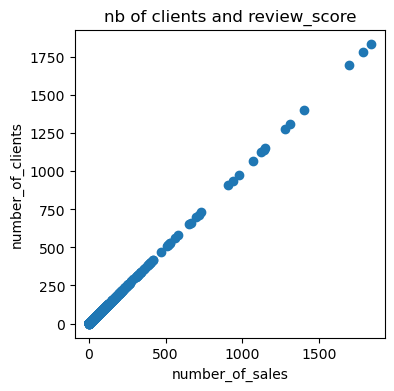

In [51]:
#Calculons la répartition moyenne des number_of_clients>50 par vendeur

fig=plt.figure(figsize=(4,4))
plt.scatter(Df_sellers["number_of_clients"], Df_sellers["number_of_sales"])
plt.title('nb of clients and review_score')
plt.ylabel('number_of_clients')
plt.xlabel('number_of_sales')
plt.show()

In [32]:
Df= pd.merge(Df,Df_products)

In [ ]:
Df.head(1)

In [ ]:
"""#Vérifions la répartition par catégorie
Df_reparti_grade=pd.DataFrame()
fig=plt.figure(figsize=(3,3))
for status in Df.product_category_name.unique() :
    Df_reparti_grade[status] = [len(Df[Df['product_category_name']==status])/len(Df)*100]
    
Df_reparti_grade =Df_reparti_grade.T
plt.pie(Df_reparti_grade[0], labels=Df_reparti_grade.index, autopct='%1.1f%%', shadow=True,colors = colors)
plt.title("répartition des product_category_name en %")
plt.show()"""

In [34]:
#Remplaçons les autres colonnes par des string
Df_sellers=object_to_string(Df_sellers).dropna()

In [35]:
cols_to_encode = Df_sellers.columns[(Df_sellers.dtypes=='datetime64[ns]')|(Df_sellers.dtypes=='string')]

laben = preprocessing.LabelEncoder()

#encodons les valeurs non numériques
for encode in cols_to_encode :
    Df_sellers[encode] = laben.fit_transform(Df_sellers[encode])


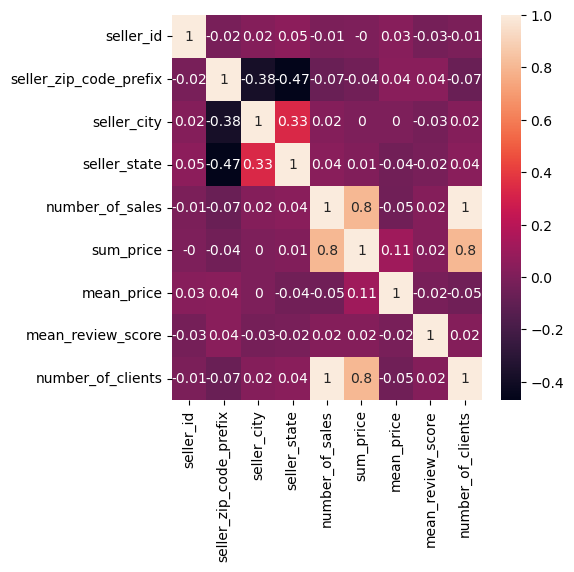

In [53]:
# Calculate correlation between each pair of variable

corr_matrix=Df_sellers.corr()
fig5 = plt.figure(figsize=(5,5))

# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
#mask[np.triu_indices_from(mask)] = True
#mask[abs(corr_matrix)<.2] = True
#mask[corr_matrix==1] = True

# Draw the heatmap with the mask
sns.heatmap(round(corr_matrix,2), mask=mask,annot=True)
plt.show()

In [ ]:
Liste_time_stamp = Df.columns[Df.dtypes=='datetime64[ns]']

X= Df.drop(Liste_time_stamp,axis=1).values

In [37]:
X= Df_sellers.values

In [38]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [61]:
from sklearn import decomposition
n_comp = 6#X.shape[1]
print(n_comp)

pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

6


PCA(n_components=6)

In [62]:
print(pca.explained_variance_ratio_.cumsum())

[0.30541477 0.50343423 0.62080142 0.73071093 0.83862059 0.91464118]


In [83]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    colors=["green", "limegreen","gold", "darkorange", "red","steelblue","blue"]
    
    for d1,d2 in axis_ranks:
        compt = 0
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha,s=1)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value,c= colors[compt])
                    compt=compt +1 

                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            max_boundary_x = np.max(np.abs(X_projected[:, [d1]])) * 1.1
            max_boundary_y = np.max(np.abs(X_projected[:, [d2]])) * 1.1
            
            min_boundary_x = np.min(X_projected[:, [d1]]) * 2
            min_boundary_y = np.min(X_projected[:, [d2]]) * 2

            plt.xlim([min_boundary_x,max_boundary_x])
            plt.ylim([min_boundary_y,max_boundary_y])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [81]:
round(Df_sellers.loc[:, "mean_review_score"],1).unique()

array([3. , 4.6, 5. , 1. , 4. , 4.5, 4.2, 4.3, 3.6, 4.8, 3.7, 3.1, 1.9,
       2. , 3.5, 4.4, 4.1, 3.8, 1.4, 4.9, 3.2, 3.9, 2.5, 3.3, 4.7, 1.5,
       2.7, 2.3, 2.2, 3.4, 2.9, 2.8, 2.6, 1.3, 1.7, 2.4, 0. , 1.8, 2.1,
       1.2])

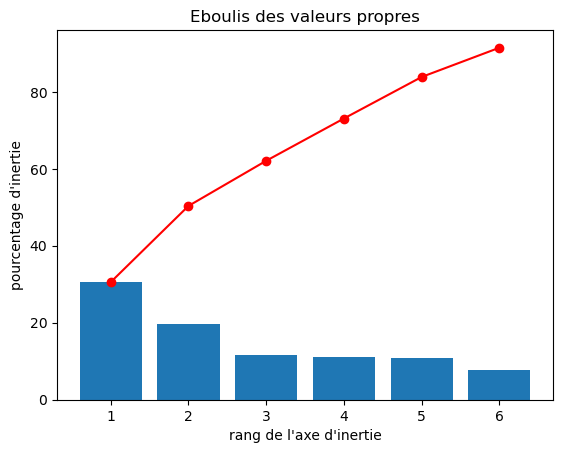

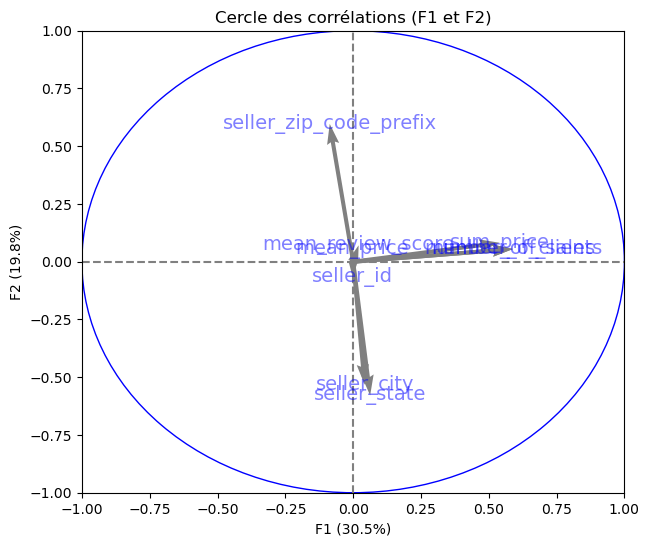

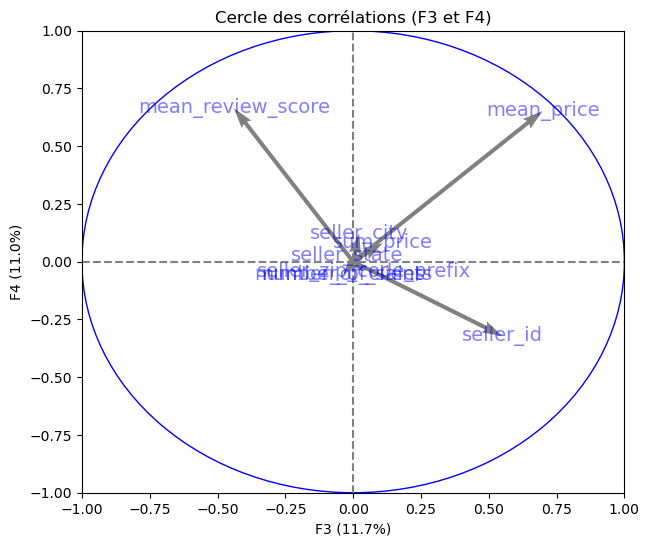

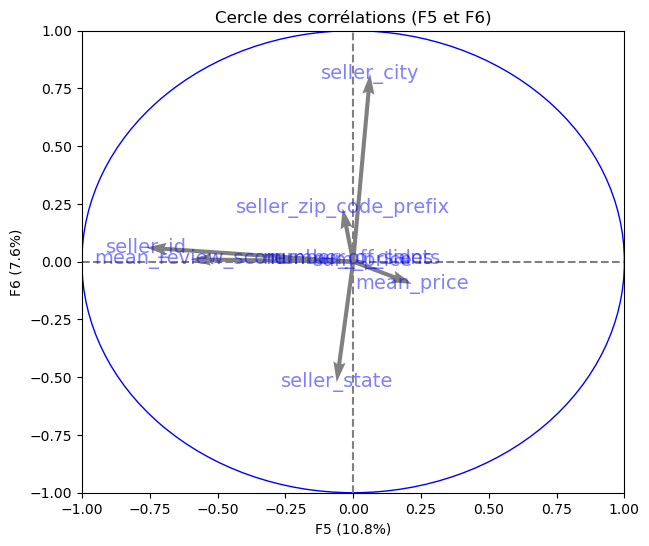

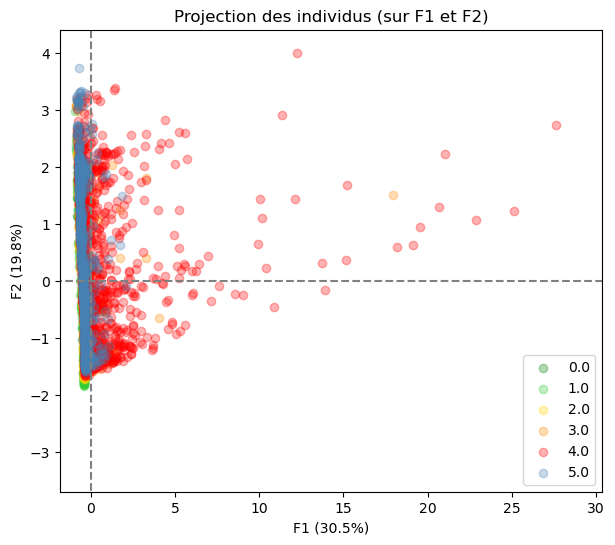

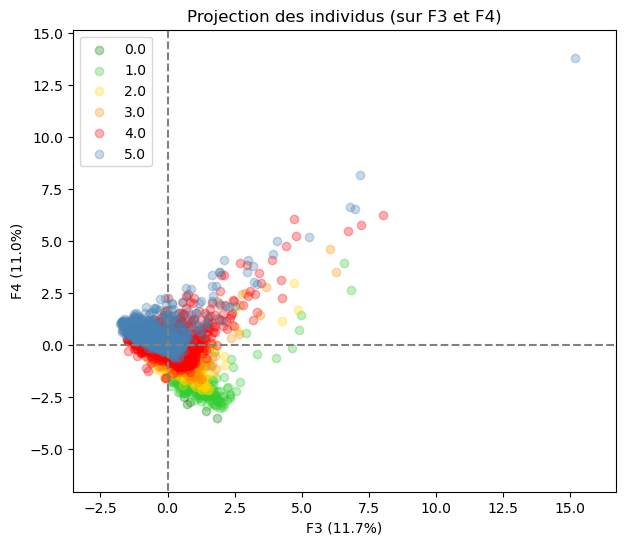

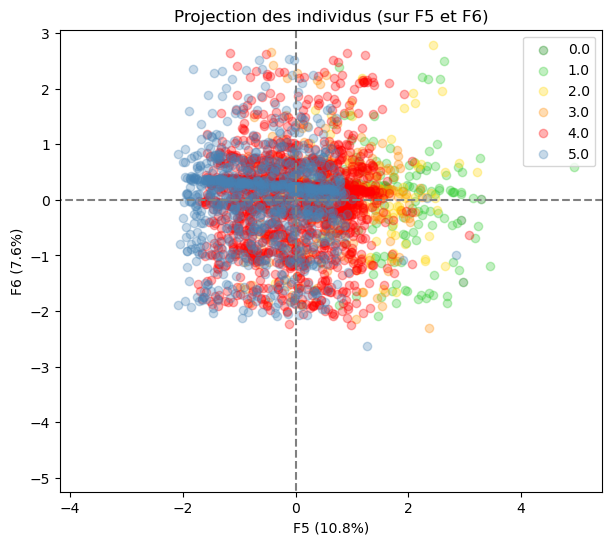

In [84]:
# Cercle des corrélations
pcs = pca.components_

# Projection des individus
X_projected = pca.transform(X_scaled)
grade = [round(Df_sellers.loc[index, "mean_review_score"],0) for index in Df_sellers.index]
features = Df_sellers.columns

# Eboulis des valeurs propres
display_scree_plot(pca)

display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)],  illustrative_var = grade, alpha=.3)

plt.show()

In [ ]:
plt.scatter(Df_final.iloc[:,1:2],Df_final.iloc[:,2:3])
plt.ylabel('review_score')
plt.xlabel('number_of_sales')
plt.title("Répartition du review_score par number_of_sales")
plt.show()

In [85]:
# Puis on applique tSNE aux données scalées :
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca')
X_trans = tsne.fit_transform(X_scaled)

array([[ 50.86905 ,  -5.078432],
       [ -6.075628, -13.241757],
       [-31.485813,   1.629267],
       ...,
       [ 16.767319, -54.020393],
       [-35.380882,  24.40031 ],
       [ -4.139783, -43.245113]], dtype=float32)